# How hypotheses are treated in statistics
## Part 2

In [1]:
import numpy as np
from scipy import stats as st
import numpy as np
from statsmodels.stats.weightstats import _tconfint_generic
import matplotlib.pyplot as plt
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

## Confidence intervals, prediction intervals

In [2]:
np.random.seed(0)
X = st.norm.rvs(size=1000,loc=100,scale=1)


n = len(X)
X_mean = np.mean(X)
S_X = np.var(X, ddof=1)

_tconfint_generic(X_mean, np.sqrt(S_X), n - 1, 0.05, 'two-sided')

(np.float64(98.01687802675285), np.float64(101.89260855826679))

## Confidence Intervals for difference in means
***

We want to see, what are the confidence intervals for $\mu_1− \mu_2$, if:

- $X,X_2$ are i.i.d with a common variance $\sigma$
- $X,X_2$ are i.i.d with variances $\sigma_1 \neq \sigma_2$
- $X,X_2$ when the populations are dependent and normally distributed

## Theorem
***

<div class="alert alert-block alert-info">

Let $X_1, X_2, ... , X_n \sim \mathcal{N}\left(\mu_X, \sigma^2\right)$ and $Y_1, Y_2, ... , Y_m \sim \mathcal{N}\left(\mu_Y, \sigma^2\right)$ are independant random samples, then a $(1-\alpha)$ confidence interval for $\mu_X - \mu_Y$ is:

$\overline{X} - \overline{Y} \pm \left(t_{\alpha/2,n+m-2}\right) S_p \sqrt{ \frac{1}{n} + \frac{1}{m}} $, where

$S^2_p = \frac{(n-1)S^2_X + (m-1)S^2_Y}{n+m-2}$

is an unbiased estimator of common variance $\sigma^2$


In [3]:
np.random.seed(0)
X = st.norm.rvs(size=100,loc=10,scale=1)
Y = st.norm.rvs(size=150, loc=5, scale=1)

n,m = len(X), len(Y)
X_mean, Y_mean = np.mean(X), np.mean(Y)
S_X, S_Y = np.var(X, ddof=1), np.var(Y, ddof=1)
S_P = ((n-1) * S_X + (m-1) * S_Y) / (n + m - 2)


_tconfint_generic(X_mean - Y_mean, 
                  np.sqrt(S_P), n + m - 2, 0.05, 'two-sided')

(np.float64(3.077441764684975), np.float64(7.01598262755048))

## Bootstraping confidence intervals

The key idea is to perform computations on the data itself to estimate the variation of statistics that are themselves computed from the same data. That is, the data is ‘pulling itself up by its own bootstrap.’

### Sampling without replacement. Sampling with replacement

### Bootstrap principle
1. $x_1, x_2, ... , x_n$ - data sample from F.
2. $u$ - statistic from sample
3. $F^*$ - empirical distribution of data (resampling distribution)
4. $x^*_1, x^*_2, ... , x^*_n$ - resample of the data of the same size
5. $u^*$ - statistic from resample

So, principle says that:
- $F^* \approx F$
- Variation of $u$ approximates $u^*$

### Parametric bootstrap


[Bootstrap confidence intervals](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf)


[When the bootstrap doesn’t work](http://notstatschat.tumblr.com/post/156650638586/when-the-bootstrap-doesnt-work)

https://github.com/facebookincubator/bootstrapped

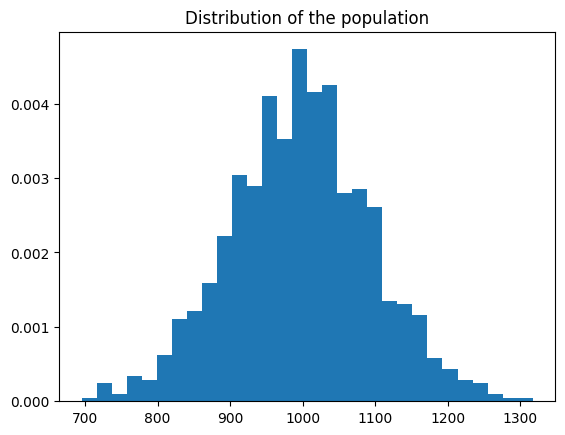

In [4]:
mean = 1000
stdev = 100

population = np.random.normal(loc=mean, scale=stdev, size=1000)

# Plot the population
count, bins, ignored = plt.hist(population, 30, density=True)

plt.title('Distribution of the population')
plt.show()

In [5]:
samples = population[:1000]
np.std([samples], axis=1)

array([97.17345395])

In [6]:
mean_results = bs.bootstrap(samples, stat_func=bs_stats.mean)
stdev_results = bs.bootstrap(samples, stat_func=bs_stats.std)

print(mean_results)
print(stdev_results)

996.9343257383252    (990.8397688038116, 1002.9522932197011)
97.17345394656526    (92.7800069746797, 101.54333344283019)


## Statistical notion of hypothesis

"What is the value of the parameter θ?"

"Is the value of the parameter θ such and such?" 

 - estimate μ, the mean body temperature of adults
 - is μ, the mean body temperature of adults, 37 degrees Celsius
***
### Hypothesis testing framework. Null hypothesis. Alternative hypothesis
***
Compare experiment data with predicted data

$X^n = (X_1, ..., X_n), X \sim P$
- $X = {0,1}$
- $X = $ accuracy of prediction

What does data tell? E.g., does it tell that model predicts better than random?

- Null hypothesis $H_0: P \in \omega$
- Alternative: $H_1: P \notin \omega$
- Statistics : $T(X^n) \sim F(X)$ if $H_0$
- $F(X)$ - null distribution of statistics
- $F(X), T(X)$ - statistical criteria for testing $H_0$ against $H_1$
***
### P-values
***
What is the probability of getting t if $H_0$ is true?
<center>$p = P(T > t | H_0)$</center>

p - probability of getting that statistics value (or more extreme) if $H_0$ is true

We compare it with significance level $\alpha$
$H_0$ is rejected in favor of $H_1$ if $p < \alpha$

### Type I and II errors
***

- $H_0$ is correct, but rejected - Type I
- $H_0$ is incorrect, but not rejected - Type II

They are not symmetric! Type I is cricical error!
<center> $ P(reject  H_0 | H_0  is  correct) = P(p<\alpha | H_0) < \alpha $ </center>

Type II is associated with power of criteria. 
Within all correct ones we choose with max value.


What we need
- Hypotheses and alternative
- Statitics
- Null distribution
- p-value

***

<center><img src="../pictures/correct_technique.png"></center>

Null hypothesis testing. Formal approach to decide if a statistical relationship in a sample reflects a real relationship in the population or is just due to chance.
 

In [7]:
import scipy

data1 = np.random.normal(0, 1, size=50)
data2 = np.random.normal(0.25, 1, size=50)

x = np.linspace(-4, 4, 160)
y1 = scipy.stats.norm.pdf(x)
y2 = scipy.stats.norm.pdf(x, loc=2)

true_mu = 0

onesample_results = scipy.stats.ttest_1samp(data1, true_mu)
print(onesample_results.pvalue)

onesample_results = scipy.stats.ttest_1samp(data2, true_mu)
print(onesample_results.pvalue)

twosample_results = scipy.stats.ttest_ind(data1, data2)
print(twosample_results.pvalue)

0.01303414440808117
0.40919413996646725
0.1511062889153715


### The Misunderstood p Value

The p value is one of the most misunderstood quantities in scientific research. 

[Statistical tests, P values, conﬁdence intervals, and power: a guide
to misinterpretations](https://fermatslibrary.com/s/statistical-tests-p-values-confidence-intervals-and-power-a-guide-to-misinterpretations)


The most common misinterpretation is that the p value is the probability that the null hypothesis is true.

### Multiple hypotheses testing
#### Family-wise error rate. FWER control procedure
FWER: Probability that any true null hypothesis is rejected.

http://simulations.lpsm.paris/fdr_tutorial/

https://github.com/puolival/multipy



## Bayesian hypothesis testing

[Are You a Bayesian or a Frequentist?](http://mlg.eng.cam.ac.uk/mlss09/mlss_slides/Jordan_1.pdf)